# Healthcare Analysis Notebook:
An project to explore and analyse a synthetic set of healthcare data.
<br>
Data taken from https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv('healthcare_dataset.csv')

In [3]:
main_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df = main_df.copy()

### Exploratory Data Analysis (EDA)
-  __Objective:__ Analyse the dataset to understand patient demographics, common conditions, billing patterns, and admission types.
-  __Steps:__
    -  Visualise age distribution, gender ratio, and common medical conditions.
    -  Examine the average billing amount by medical condition, hospital, and insurance provider.
    -  Identify any seasonal trends in admissions.

In [5]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [6]:
df.shape

(55500, 15)

In [7]:
df.drop(columns=["Room Number","Name","Doctor"],axis=1,inplace=True)

In [8]:
df.duplicated().sum()

534

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 54966 non-null  int64  
 1   Gender              54966 non-null  object 
 2   Blood Type          54966 non-null  object 
 3   Medical Condition   54966 non-null  object 
 4   Date of Admission   54966 non-null  object 
 5   Hospital            54966 non-null  object 
 6   Insurance Provider  54966 non-null  object 
 7   Billing Amount      54966 non-null  float64
 8   Admission Type      54966 non-null  object 
 9   Discharge Date      54966 non-null  object 
 10  Medication          54966 non-null  object 
 11  Test Results        54966 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.5+ MB


In [11]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 54966 non-null  int64         
 1   Gender              54966 non-null  object        
 2   Blood Type          54966 non-null  object        
 3   Medical Condition   54966 non-null  object        
 4   Date of Admission   54966 non-null  datetime64[ns]
 5   Hospital            54966 non-null  object        
 6   Insurance Provider  54966 non-null  object        
 7   Billing Amount      54966 non-null  float64       
 8   Admission Type      54966 non-null  object        
 9   Discharge Date      54966 non-null  datetime64[ns]
 10  Medication          54966 non-null  object        
 11  Test Results        54966 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 5.5+ MB


In [12]:
# Visualise age distribution
df['Age'].describe()

count    54966.000000
mean        51.535185
std         19.605661
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

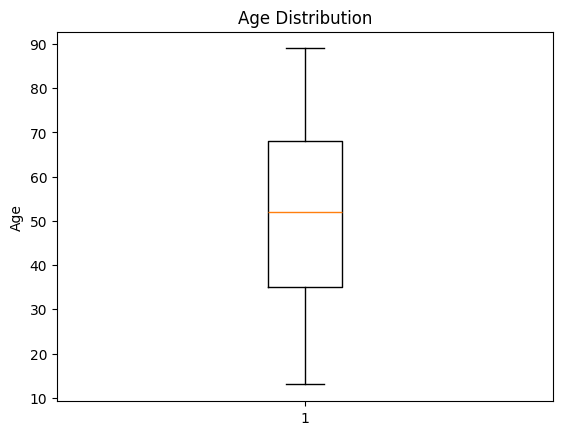

In [13]:
plt.figure()
plt.title('Age Distribution')
plt.ylabel('Age')
plt.boxplot(df['Age'])
plt.show()

In [14]:
# Gender ratio
females = df['Gender'].value_counts()['Female']
males = df['Gender'].value_counts()['Male']
total = females + males
print(f"{(males*100 / total).round(2)}% of patients are male, {(females*100 / total).round(2)}% are female")

50.02% of patients are male, 49.98% are female


In [15]:
# Medical conditions
df['Medical Condition'].describe()

count         54966
unique            6
top       Arthritis
freq           9218
Name: Medical Condition, dtype: object

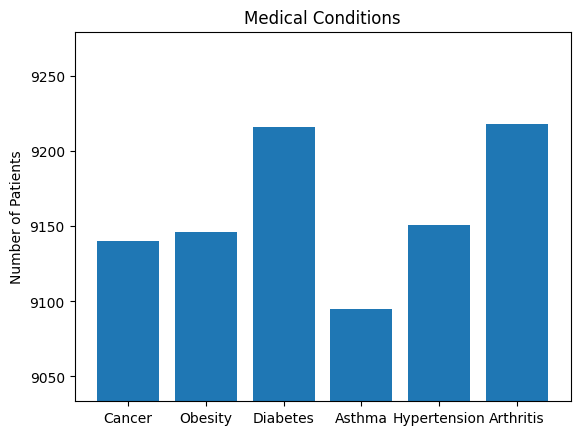

In [32]:
conditions = list(df['Medical Condition'].unique())
counts = [df['Medical Condition'].value_counts()[condition] for condition in conditions]
high = max(counts)
low = min(counts)

plt.figure()
plt.ylim(low-0.5*(high-low),high+0.5*(high-low))
plt.title('Medical Conditions')
plt.ylabel('Number of Patients')
plt.bar(conditions,counts)
plt.show()

In [17]:
# Billing amounts
df['Billing Amount'].describe()

count    54966.000000
mean     25544.306284
std      14208.409711
min      -2008.492140
25%      13243.718641
50%      25542.749145
75%      37819.858159
max      52764.276736
Name: Billing Amount, dtype: float64

In [18]:
bills_df = df[df['Billing Amount'] >= 0]
bills_df.describe()

,Age,Date of Admission,Billing Amount,Discharge Date
count,54860.000000,54860,54860.000000,54860
mean,51.533850,2021-11-01 19:01:50.506744576,25594.633637,2021-11-17 07:00:08.137076224
min,13.000000,2019-05-08 00:00:00,9.238787,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13299.747940,2020-08-13 00:00:00
50%,52.000000,2021-11-02 00:00:00,25593.873000,2021-11-18 00:00:00
75%,68.000000,2023-02-03 00:00:00,37847.066671,2023-02-19 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,2024-06-06 00:00:00
std,19.605295,NaN,14175.867041,NaN


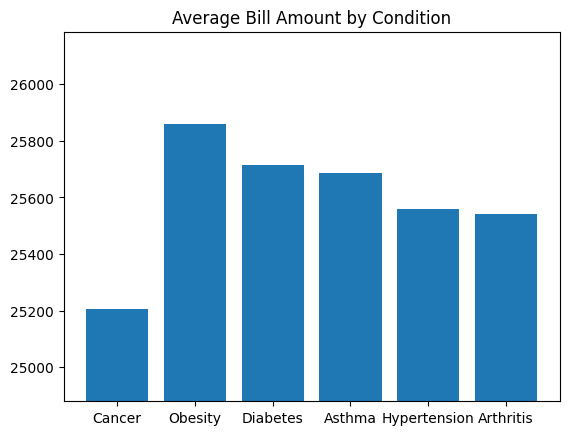

In [19]:
# Examine the average billing amount by medical condition

bills = []
for condition in conditions:
    average_bill = bills_df[bills_df['Medical Condition'] == condition]['Billing Amount'].mean().round(2)
    bills += [average_bill]

high = max(bills)
low = min(bills)

plt.figure()
plt.title('Average Bill Amount by Condition')
plt.ylim(low-0.5*(high-low),high+0.5*(high-low))
plt.bar(conditions,bills)
plt.show()

In [20]:
bills_df['Insurance Provider'].describe()

count     54860
unique        5
top       Cigna
freq      11115
Name: Insurance Provider, dtype: object

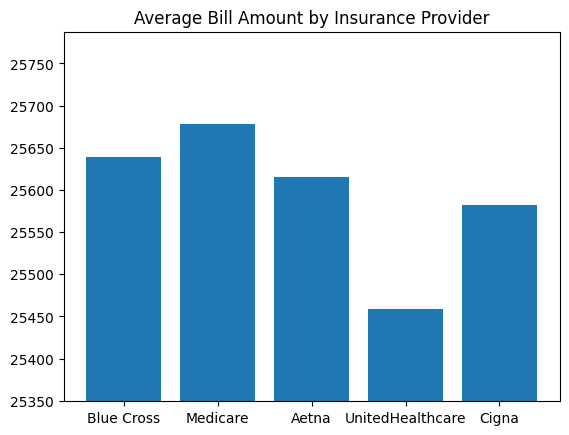

In [21]:
# Examine the average billing amount by insurance provider

providers = list(bills_df['Insurance Provider'].unique())

bills = []
for provider in providers:
    average_bill = bills_df[bills_df['Insurance Provider'] == provider]['Billing Amount'].mean().round(2)
    bills += [average_bill]

high = max(bills)
low = min(bills)

plt.figure()
plt.title('Average Bill Amount by Insurance Provider')
plt.ylim(low-0.5*(high-low),high+0.5*(high-low))
plt.bar(providers,bills)
plt.show()

In [22]:
bills_df['Hospital'].describe()

count         54860
unique        39815
top       LLC Smith
freq             44
Name: Hospital, dtype: object

In [43]:
# Examine the average billing amount by hospital

hospitals = list(bills_df['Hospital'].unique())

cheapest_hospital = [hospitals[0], bills_df[bills_df['Hospital'] == hospitals[0]]['Billing Amount'].mean()]
most_expensive_hospital = [hospitals[0], bills_df[bills_df['Hospital'] == hospitals[0]]['Billing Amount'].mean()]

for hospital in hospitals[1:]:
    average_bill = bills_df[bills_df['Hospital'] == hospital]['Billing Amount'].mean()
    if average_bill < cheapest_hospital[1]:
        cheapest_hospital = [hospital, average_bill]
    if average_bill > most_expensive_hospital[1]:
        most_expensive_hospital = [hospital, average_bill]


In [46]:
print(f"The most expensive hospital is {most_expensive_hospital[0]}, with an average billing amount of {most_expensive_hospital[1].round(2)}")
print(f"The cheapest hospital is {cheapest_hospital[0]}, with an average billing amount of {cheapest_hospital[1].round(2)}")

The most expensive hospital is Hernandez-Morton, with an average billing amount of 52373.03
The cheapest hospital is Perez Hoover, Moore and, with an average billing amount of 9.24


In [30]:
# Identify most common months for hospital admissions
df['Month of Admission'] = pd.DatetimeIndex(df['Date of Admission']).month_name()

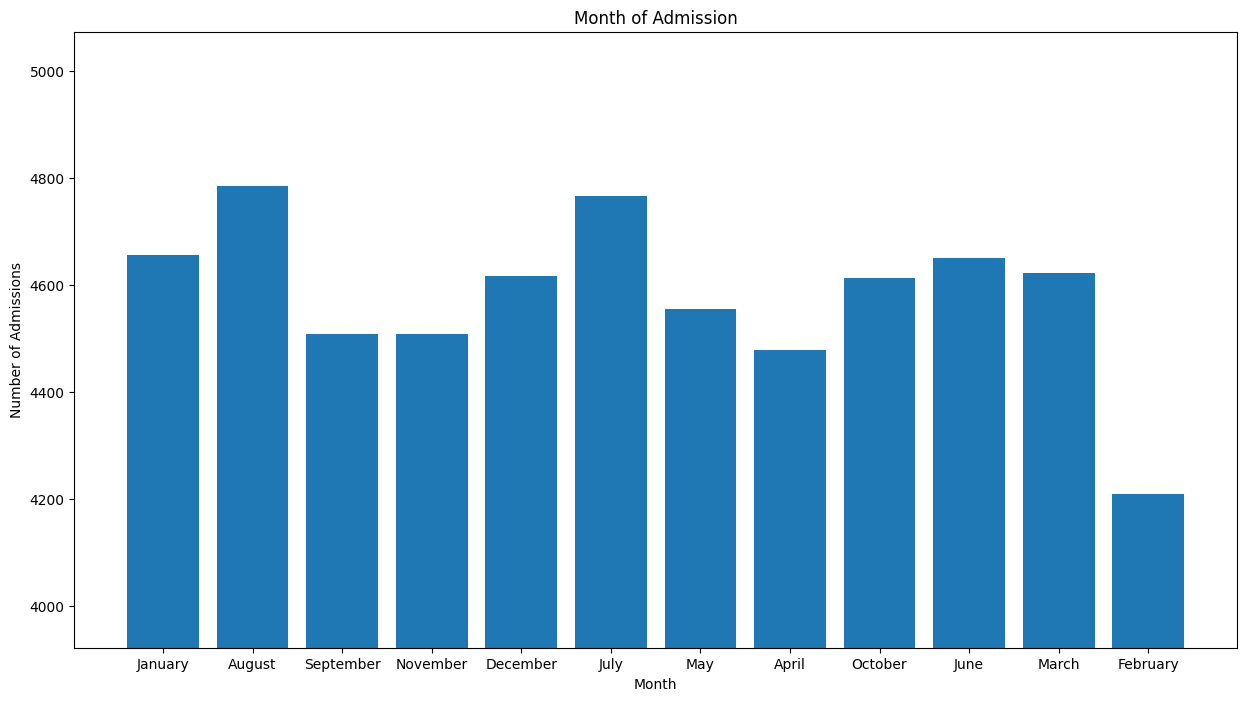

In [36]:
months = list(df['Month of Admission'].unique())
counts = [df['Month of Admission'].value_counts()[month] for month in months]

high = max(counts)
low = min(counts)

plt.figure(figsize=(15,8))
plt.ylim(low-0.5*(high-low),high+0.5*(high-low))
plt.title('Month of Admission')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.bar(months, counts)
plt.show()

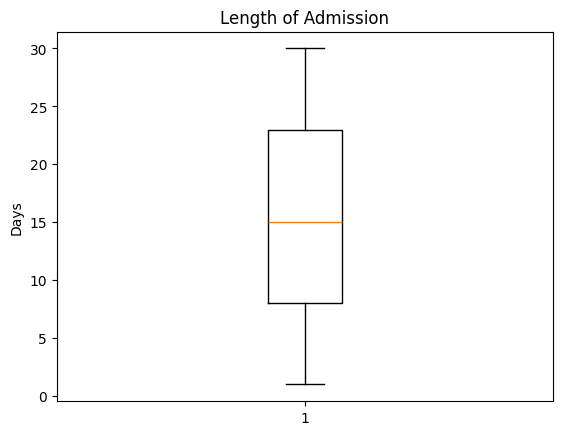

In [44]:
# Examine the lengths of admissions
df['Length of Admission'] = (df['Discharge Date'] - df['Date of Admission']) / np.timedelta64(1, 'D')

plt.figure()
plt.title('Length of Admission')
plt.ylabel('Days')
plt.boxplot(df['Length of Admission'])
plt.show()